#### Saturation analyses on the Lx, for whole genome

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
dir_Lx = '../out/20.0518 Lx/'
recall_cutoff = 0.95
Lx_range = [25,75,100,200]
#Lx_range = [100,200]

In [45]:
def getPct(x, model_name, cutoff=0.95):
    # get the fraction of targets with recall > cutoff
    # given as is refering to Lx
    df_results = pd.read_csv('%s/L%sonly_reg_elasticnet_all/model_results.csv' % (dir_Lx, x))
    
    #genes_pass = df_results.loc[df_results.score_test>0,'target']
    #genes_pass = df_results.loc[(df_results.score_train - df_results.score_test) < 0.1,'target']
    #df_results = df_results.loc[df_results.target.isin(set(genes_pass)),:].copy()
    
    df_results = df_results.loc[df_results.model == model_name,:].copy()
    n_total = df_results.shape[0]
    n_pass = sum(df_results.corr_test_recall > cutoff)
                
    return n_total, n_pass/n_total, np.nanmean(df_results.corr_test), np.nanmean(df_results.score_test), np.nanmean(df_results.score_train)


def getStats(model_name):
    df_stats = {'Lx':[], 'recall_pct':[], 'mean_corr':[], 'mean_R2_test':[], 'mean_R2_train':[], 'n':[]}
    for x in Lx_range:
        df_stats['Lx'].append(x)
        n, recall_pct, mean_corr, mean_R2_test, mean_R2_train = getPct(x, model_name, recall_cutoff)
        df_stats['recall_pct'].append(recall_pct)
        df_stats['mean_corr'].append(mean_corr)
        df_stats['mean_R2_test'].append(mean_R2_test)
        df_stats['mean_R2_train'].append(mean_R2_train)
        df_stats['n'].append(n)
    df_stats = pd.DataFrame(df_stats)
    return df_stats

#### based on reduced model top 10 feat

In [46]:
df_stats = getStats('top10feat')
df_stats

,Lx,recall_pct,mean_corr,mean_R2_test,mean_R2_train,n
0,25,0.409549,0.165433,0.014849,0.033539,1487
1,75,0.527481,0.235376,0.044880,0.062694,2620
2,100,0.534695,0.238850,0.047728,0.066254,2594
3,200,0.572737,0.258936,0.056332,0.075991,2729


[Text(0,0.5,'% targets with recall > 0.95'), Text(0.5,0,'Lx')]

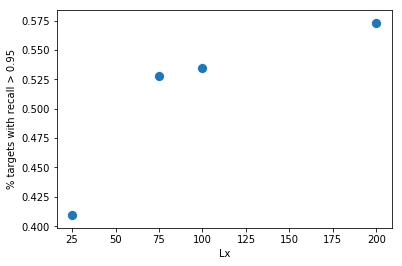

In [47]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0,0.5,'Mean correlation (rho)'), Text(0.5,0,'Lx')]

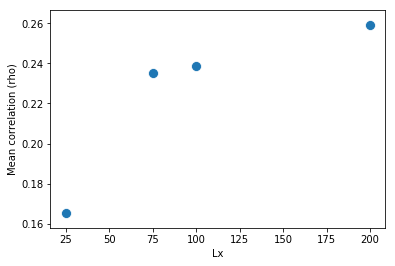

In [48]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')

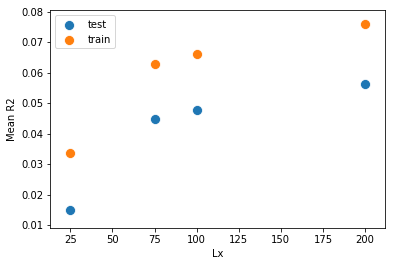

In [49]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test, s=100)
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_train, s=100)
ax.set(xlabel='Lx', ylabel='Mean R2')
ax.legend(labels=['test', 'train'])

#### based on reduced model

In [50]:
df_stats = getStats('topfeat')
df_stats

,Lx,recall_pct,mean_corr,mean_R2_test,mean_R2_train,n
0,25,0.408877,0.165433,0.014849,0.033539,1487
1,75,0.529008,0.235381,0.044881,0.062696,2620
2,100,0.533924,0.238858,0.047739,0.066263,2594
3,200,0.571638,0.258949,0.056354,0.076027,2729


[Text(0,0.5,'% targets with recall > 0.95'), Text(0.5,0,'Lx')]

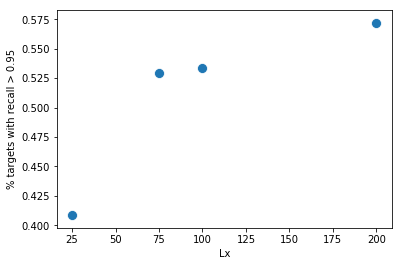

In [51]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0,0.5,'Mean correlation (rho)'), Text(0.5,0,'Lx')]

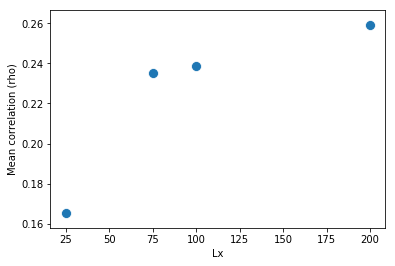

In [52]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')

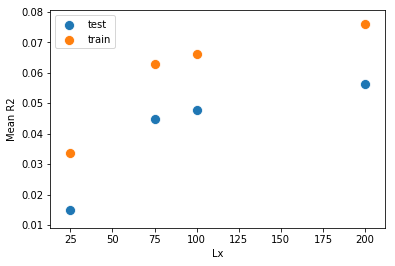

In [53]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test, s=100)
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_train, s=100)
ax.set(xlabel='Lx', ylabel='Mean R2')
ax.legend(labels=['test', 'train'])

#### based on full model

In [54]:
df_stats = getStats('all')
df_stats

,Lx,recall_pct,mean_corr,mean_R2_test,mean_R2_train,n
0,25,0.032882,0.165492,-0.011842,0.002726,18308
1,75,0.075246,0.235381,-0.005694,0.008996,18260
2,100,0.076168,0.238858,-0.005380,0.009426,18236
3,200,0.085773,0.258949,-0.003594,0.011437,18141


[Text(0,0.5,'% targets with recall > 0.95'), Text(0.5,0,'Lx')]

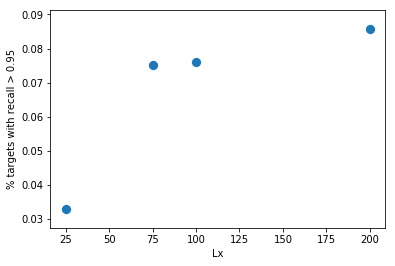

In [55]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0,0.5,'Mean correlation (rho)'), Text(0.5,0,'Lx')]

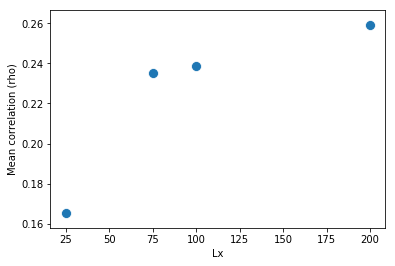

In [56]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')

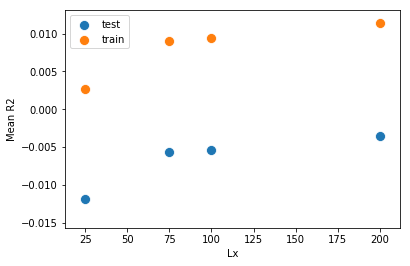

In [57]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test, s=100)
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_train, s=100)
ax.set(xlabel='Lx', ylabel='Mean R2')
ax.legend(labels=['test', 'train'])